## [지리 정보 데이터 처리](https://datascienceschool.net/03%20machine%20learning/03.04.01%20%EC%A7%80%EB%A6%AC%20%EC%A0%95%EB%B3%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html)
지리정보데이터, GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 , 우편번호 등이 있다. 이 절에서는 지리정보를 처리하는 데 유용한 패키지와 지리 정보 데이터를 처리하는 방법에 대해 설명할 것이다.

### GeoPandas
GeoPandas는 파이썬에서 지리정보 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지이다. 이름으로도 알 수 있듯이, GeoPandas는 Pandas와 비슷하다. 두 가지의 자료형 GeoSeries와 GeoDataFrame이 있다. 다루는 방법에 큰 차이가 없다. 다만 지리정보 데이터 분석에 유용한 속성과 메서드가 존재한다. 다음처럼 gpd라는 이름으로 임포트 하는 것이 관례이다.

#### [설치 방법](https://thlee33.medium.com/windows-10%EC%97%90%EC%84%9C-geopandas-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-2021-07-f07efea9294a)

링크에서 파일 다운받은 후, 라이브러리 경로에 넣고
아래의 설치/업데이트 구문을 한줄씩 실행합니다.
먼저, pip와 numpy를 업그레이드하거나, uninstall 후 설치합니다.

In [1]:
# !pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl

In [2]:
# !pip install GDAL-3.3.2-cp38-cp38-win_amd64.whl

In [3]:
# !pip install Fiona-1.8.20-cp38-cp38-win_amd64.whl

In [4]:
# !pip install geopandas-0.9.0-py2.py3-none-any.whl

#### [sharpely.goes가 없다고 오류 떠서 참고함](https://stackoverflow.com/questions/65345213/could-not-find-module-or-one-of-its-dependencies-try-using-the-full-path-with)
윈도우 검색 -> anaconda prompt -> 명령어 입력
- pip uninstall shapely
- conda install shapely
- pip install geos

차례대로 입력 후에 밑의 줄 실행

In [5]:
# !pip install geopandas

In [6]:
import shapely
import geopandas as gpd

---

## 실습
GeoPandas는 간단한 지리정보데이터를 실습 할 수 있는 샘플 데이터 셋(country)을 제공한다.  
이 데이터를 사용해 GeoPandas의 기초적인 기능을 학습하겠다.  
이 실습 데이터는 gpd.dataset.get_path() 명령으로 데이터의 링크를 불러와 사용 한다.

In [7]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [8]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


### **지리 정보의 시각화**
GeoSeries와 GeoDataFrame 객체의 plot()명령을 사용하면, GeoPandas 내부의 Geometry 데이터를 손쉽게 시각화 할 수 있다.  
이 때, Geometry 데이터는 지리정보를 표현하는 다각형(폴리곤), 선(라인), 점(포인트)을 의미하는데, **GeoPandas는 내부적으로 다각형, 선, 점을 Shapely 패키지를 사용하여 처리한다.**  
각 Polygon, LineString, Point 로 정의되어 있다.  
GeoPandas가 제공하는 데이터에는 Geometry 데이터가 이미 포함되어 있지만, 우리가 가진 데이터를 활용해 생성할 수도 있다.  
이 부분은 다음 부분에서 학습 하겠다.

대부분의 경우 지리정보를 시각화 할 때는 위치에 따른 정보의 변화를 함께 표현한다.  
이 때는 **plot() 명령의 column 인자에 반영하고 싶은 데이터의 열 이름을 입력하면 해당 열의 데이터를 색(color)으로 표현한다.**  
표현하려는 정보가 **카테고리 데이터 일때는 categorical인자를 True**로 설정한다.

>### ※글꼴 설정

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [10]:
for font in font_manager.fontManager.ttflist:
    if 'Na' in font.name:
        print(font.name, font.fname)

NanumSquare C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareL.ttf
NanumBarunGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothicBold.ttf
NanumSquare_ac C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acL.ttf
NanumBarunGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NANUMBARUNGOTHICULTRALIGHT.TTF
NanumGothic C:\Windows\Fonts\.TTF
NanumSquare_ac C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf
NanumBarunGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothic.ttf
NanumSquare C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareB.ttf
NanumGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
NanumSquare_ac C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acR.ttf
NanumSquare C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumSquareEB.ttf
NanumSquare_ac C:\Users\user\AppData\Local\Microso

Text(0.3, 0.3, '한글')

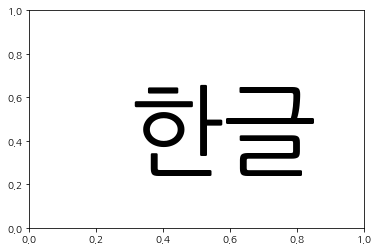

In [11]:
plt.rc('font', family='NanumGothic')
plt.text(0.3, 0.3, '한글', size=100)

>### ※워닝 무시 설정

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


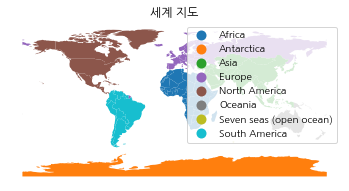

In [14]:
ax = countries.plot(column="continent", legend=True, categorical=True) #컨트리 샘플데이터
ax.set_title("세계 지도")  #한글 기본폰트설정으로 인해 영어폰트 워닝 생기지만 무시
ax.set_axis_off()
plt.show()

만약, **표현하고 싶은 컬럼이 실수 변수**라면, 색을 변화시키는 기준 즉, 데이터를 구분하는 방법과 갯수를 정의할 수 있다.  
먼저 구분하는 방법은 plot()명령의 scheme 인자로 설정하는데, 지원하는 것으로는 “Equal_interval”(동일한 간격으로 구분), “Quantiles”(4분위수를 구하여 구분), “Fisher_Jenks”(클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분)가 있다.  
구분하는 갯수는 k 인자에 원하는 숫자를 입력하면된다. 디폴트는 5이다.

다음 코드는 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP를 만들고, 이를 지도에서 색으로 표현한 예이다.

추가적으로, 정보를 색으로 나타낼 때는 표현하려는 정보에 따라, 컬러맵을 설정하는 것이 좋다.  
이 예와 같이 수치적인 정보를 시각화 할 때는, 수치만큼 색이 밝고 어두워지는 것으로 표현하는 것이 더 적절하기 때문에 Sequence 계열의 컬러맵을 설정하는 것이 좋다.  
컬러맵에 대해서는 이 곳을 참고하길 바란다.  [참고](https://matplotlib.org/users/colormaps.html)

In [15]:
#시퀀스계열 컬러맵 설정 패키지
# !pip install mapclassify 
import mapclassify

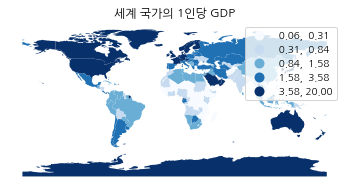

In [16]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

### Geometry 데이터
이전에 언급 했듯이, GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리한다. 여기서는 Geometry 데이터에 대해서 공부해보도록 하자.

### Polygons
한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다. **“Countries” 데이터에서는 다음처럼 Polygon 데이터를 제공한다.**

In [17]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [18]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

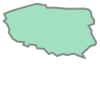

In [19]:
countries.geometry[113]

### Points
어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다. “Cities” 데이터에서는 도시를 하나의 점으로 나타내었다. 이 점을 다음처럼 지도위에 표현 할 수 있다.

In [20]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [21]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

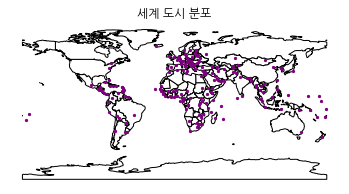

In [22]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='purple', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

### LineString
점과 점을 이은 것은 선이 된다. 두 도시 사이의 길, 강의 흐름, 국경의 생김새, 경계면 정보 등을 선으로 나타낼 수 있겠다. 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다. 여기서 사용되는 squeeze()함수는 GeoPandas 객체에서 Geometry 데이터 만을 추출해주는 기능을 한다. boundary 속성에 대해서는 다음 단락에서 학습 하겠다.

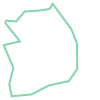

In [23]:
korea_border = countries[countries.name == "South Korea"].geometry
# 버전 6.x에서는 "South Korea"를 사용해야 함

korea_border.boundary.squeeze()  #테두리를 연결해줌

### Geometry 데이터의 속성
Geometry 타입의 데이터는 다음과 같은 속성을 가지고 있다.

- 지리정보의 속성 ( 아래의 속성값은 Point 데이터에서는 모두 0이다. )

    - area : 넓이

    - boundary : 테두리

    - centroid : 중앙지점

그리고 두 Geometry 간의 거리를 계산 해주는 함수 또한 유용하게 사용된다.

- distance : 두 점사이의 거리

넓이, 거리는 우리가 흔히 사용하는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다. 그래서 같은 객체 안에서의 비교만 가능하다.

# **★GeoPandas의 지리 데이터 간의 관계 연산★**
GeoPandas는 지리데이터 간의 관계를 연산해주는 기능을 가지고 있다. 관계를 연산한다는 말은, 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다.

**좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용해, 어떤 도시가 어느 나라 안에 있는지, 도시끼리의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계**를 알 수 있다.

## 관계 연산 예제
지리적 관계에 대한 경우의 수는 매우 많기 때문에, 간단한 예제를 통해 기본적인 관계연산을 학습해 보겠다.

먼저, 동북아시아의 주요 국가와 도시를 각 각 선과 점으로 나타내고, 도시들을 이어 주었다.

### *북한 제외 예제*

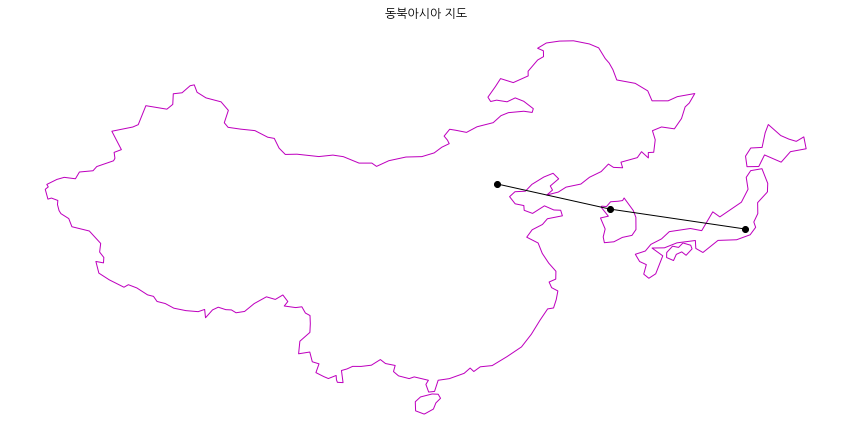

In [24]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])] #South Korea로 표기
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m") #동북아시아


seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze() #서울 점
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze() #베이징 점
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze() #도쿄 점

line = LineString([beijing, seoul, tokyo]) #세 점 잇기

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

### *북한 포함하여 실습*

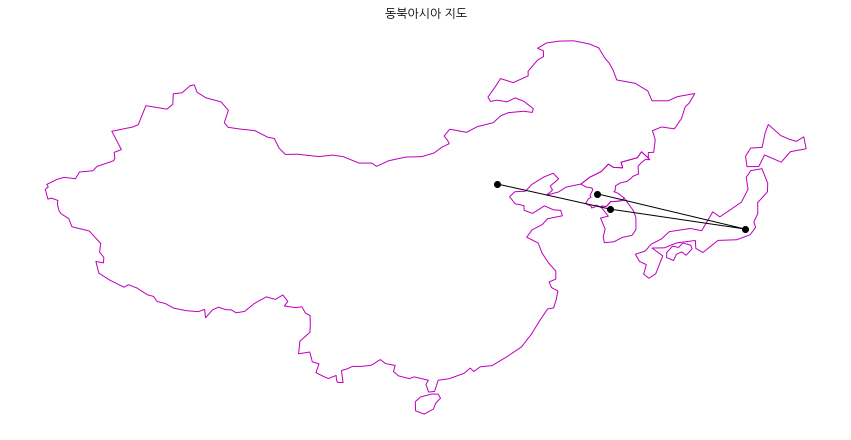

In [25]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'North Korea','China', 'Japan'])] #North Korea 추가
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m") #동북아시아 지도

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze() #서울 점
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze() #베이징 점
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze() #도쿄 점
pyongyang=cities.loc[cities.name == "Pyongyang", "geometry"].squeeze() #평양 점

line = LineString([beijing, seoul, tokyo, pyongyang]) #세 점 잇기

ax = gpd.GeoSeries([seoul, beijing, tokyo,pyongyang, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

In [26]:
# cities[cities['name'].str.startswith('P')] #평양 있나 찾아보려고 p로 시작하는 도시 찾기

## 관계연산 함수

### 기본 관계 연산

- within : 지리적으로 포함되는지 여부 

- contains : 지리적으로 포함하고 있는지 여부

- intersects : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환

- crosses : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다.

In [27]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [28]:
seoul.within(korea) #서울이 한국에 포함되나?

True

In [29]:
korea.contains(seoul) #한국이 서울을 포함하나?

True

In [30]:
china.intersects(korea) #중국과 한국(남한)은 맞닿아 있나?

False

In [31]:
line.crosses(korea) #라인이 한국 내부를 지나가는가? 

True

In [32]:
countries[countries.crosses(line)] #라인이 지나가는 나라들 목록

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


### 속성을 이용한 연산

In [33]:
seoul.distance(beijing) #서울에서 베이징까지의 거리

10.871264032732043

In [34]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)] #서울과 베이징 거리보다 가까운 나라 찾기
#러시아, 북한, 우리나라, 중국, 일본
#폴리곤까지의 거리가 베이징보다 더 가까운 중국으로 잡히는 것으로 추정

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.780 42.220, 130.780 42.220...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.175 37.750, 126.237 37.840, 126....",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.885 39.181, 140.959 38.174...",3.900313


In [35]:
countries.geometry.distance(seoul)

0       74.740336
1       97.430523
2      136.024984
3      179.922177
4      194.097574
          ...    
172    104.164723
173    106.791091
174    105.346956
175    189.782241
176     97.143399
Length: 177, dtype: float64

In [36]:
china.area / korea.area #한국과 중국의 면적 비율

95.89679828612043

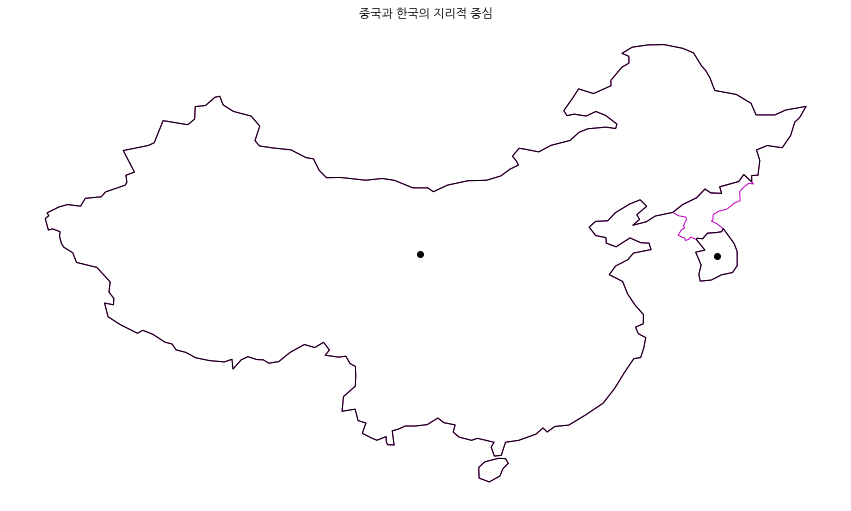

In [37]:
base = northern_asia[northern_asia.name != "Japan"].plot(figsize=(15, 15), color="w", edgecolor="m")
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid,      #센트로이드(중앙 지점)를 써서 지리적 중심 표시
                    korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("중국과 한국의 지리적 중심")
ax.set_axis_off()
plt.show()

### 지리 정보 조작
이번에는 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제를 만들었다.

데이터는 [아래의 링크](http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin)에서 다운로드 할 수 있다.

컬럼 설명

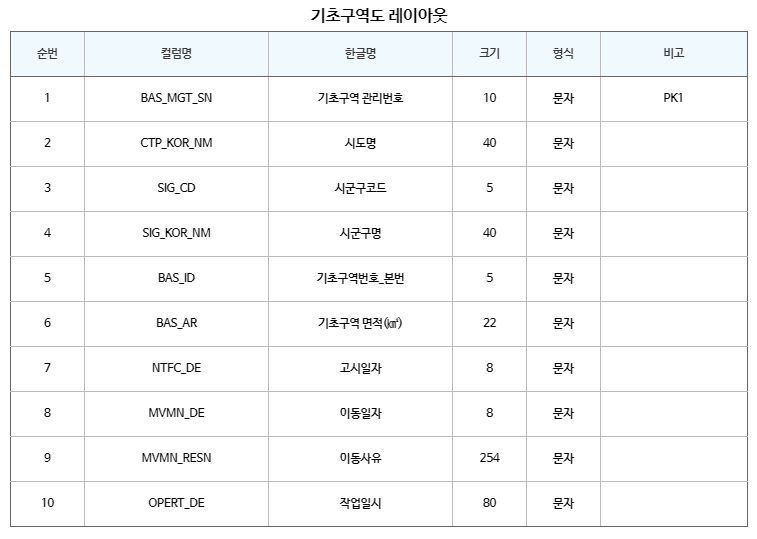

### **shape file 이란 ?**

- .shp, .shx, .dbf 3개의 파일을 합쳐서 shape file 이라고 한다. shpae file은 GIS에서 사용하는 벡터 형식의 데이터 이다.

- .shp : 점, 다각형 등의 지리정보를 담고 있다. 이 때 지리정보의 타입은 혼용되지 않는다. 점과 다각형이 같은 파일에 저장 될 수 없다는 뜻이다.

- .shx : 지리정보의 인덱스 정보를 담고 있다.

- .dbf : 지리정보의 속성 정보를 담고 있다.

.shp 파일은 나머지 .dbf, .shx 파일이 없으면 불러올 수 없다.

#### *기초구역도 예제*

In [38]:
seoul_file = "data/TL_KODIS_BAS.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)
seoul1=seoul

In [39]:
seoul

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,0.143509,03034,1111000035,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952791.984 1953978.823, 952796.670 1..."
1,0.153172,03015,1111000037,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952092.217 1956111.385, 952106.087 1..."
2,0.046852,03018,1111000038,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952580.170 1955803.287, 952587.806 1..."
3,0.521175,03002,1111000111,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((953333.378 1957708.031, 953232.695 1..."
4,0.048406,03058,1111000112,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((954902.447 1953446.631, 954897.399 1..."
...,...,...,...,...,...,...,...,...,...,...,...
5660,0.105839,05212,1174000198,서울특별시,None,None,20121221,None,11740,강동구,"POLYGON ((971536.933 1951499.607, 971545.989 1..."
5661,0.377190,05239,1174000199,서울특별시,None,None,20121221,None,11740,강동구,"POLYGON ((967281.158 1950778.841, 967280.933 1..."
5662,0.266464,05414,1174000215,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971485.617 1952675.751, 971012.401 1..."
5663,0.129090,05415,1174000216,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971012.401 1952516.672, 971485.617 1..."


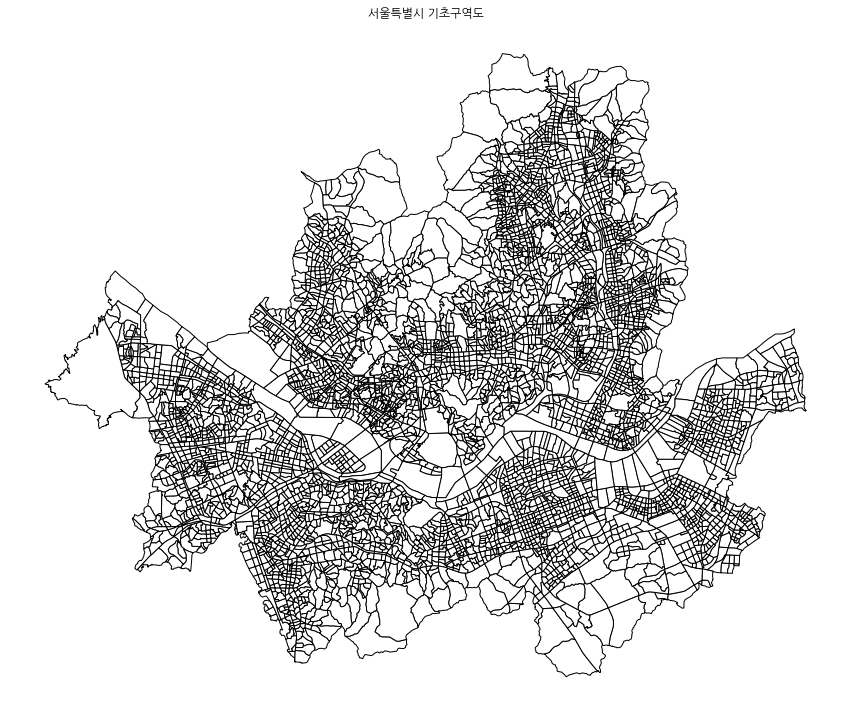

In [40]:
ax = seoul.plot(figsize=(15, 15), color="w", edgecolor="k")
ax.set_title("서울특별시 기초구역도")
ax.set_axis_off()
plt.show()

---

#### *수집한 행정동 데이터로 실습*

In [49]:
seoul_ad_dong = "data/서울특별시 행정동.shp" # 구별 컬럼이 없는 데이터
seoul_dong = gpd.read_file(seoul_ad_dong, encoding='euckr')
seoul_dong

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."
...,...,...,...,...,...
420,20200630,1125070,둔촌1동,421,"POLYGON ((212078.230 447711.872, 212143.611 44..."
421,20200630,1125071,둔촌2동,422,"POLYGON ((213836.559 448672.955, 213835.205 44..."
422,20200630,1125072,암사1동,423,"POLYGON ((211988.426 450586.506, 211989.301 45..."
423,20200630,1125073,천호2동,424,"POLYGON ((210279.922 450065.332, 210287.877 45..."


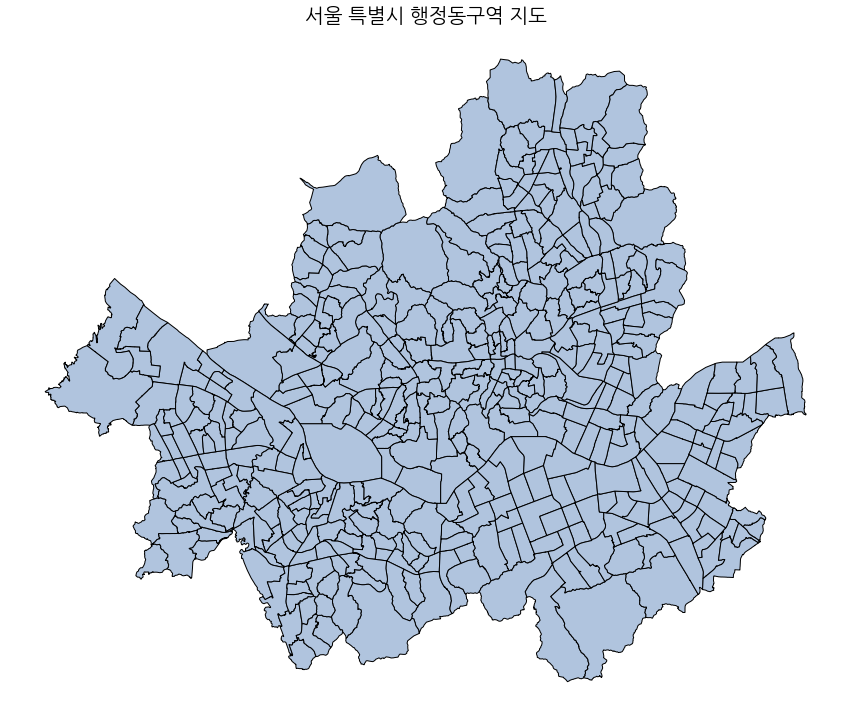

In [50]:
seoul_dong_map = seoul_dong.plot(figsize=(15, 15), color="lightSteelblue", edgecolor="k")
seoul_dong_map.set_title("서울 특별시 행정동구역 지도", fontsize=20)
seoul_dong_map.set_axis_off()
plt.show()

---

#### 동작구의 기초 구역도 실습

다음 나열된 함수들은 지리정보를 변환하는 기능을 가진다.

- convex_hull : 볼록외피로, 가장 바깥 노드로만 연결함 

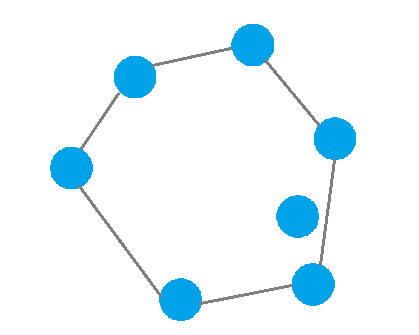

- envelope : Polygon 데이터를 감싸는 가장 작은 사각형을 그린다.

- simplify(tolerance, preserve_topology=True) : Polygon 데이터에 대해 컨투어 추정을 한다.

- buffer(distance, resolution=16) : Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만들고, Polygon에 적용하면 주어진 거리만큼 확장한다.

- unary_union : 여러 개의 geometry 데이터의 합집합을 구한다. Polygon 내에 빈 곳이 있는 경우, unary_union가 실행 되지 않는다. 이 때는 buffer() 명령으로 Polygon의 빈 곳을 채워준 후 사용한다.

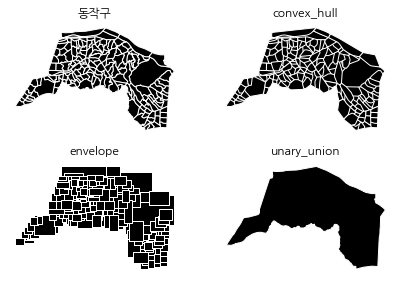

In [51]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax) #그냥 플롯
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax) #convex_hull= 그냥 플롯이랑 유사해 보임
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax) #envelope=각 기초구역을 감싸는 최소의 사각형으로 표시
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4) 
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union] #버퍼를 0.1 정도 생성해서 빈 부분 채워주고 합치기
              ).plot(ax=ax, color="k", edgecolor='w') 
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공한다.

- Dissolve

- GeoDataFrame 내의 geometry를 그룹 별로 unary_union를 이용해 geometry 데이터를 합친다.

### 색상 팔레트
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [52]:
seoul1.head()

,geometry,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_KOR_NM
SIG_CD,,,,,,,,,,
11110,"POLYGON ((954690.377 1952218.088, 954689.190 1...",0.143509,03034,1111000035,서울특별시,20161027,기초구역 경계 변경에 의한 기초구역 변경,20121221,20161027000000,종로구
11140,"POLYGON ((956334.141 1949931.634, 956334.145 1...",0.038319,04565,1114000109,서울특별시,None,None,20121221,None,중구
11170,"POLYGON ((952019.628 1946337.603, 951979.105 1...",1.337127,04340,1117000049,서울특별시,None,None,20121221,None,용산구
11200,"POLYGON ((961041.648 1948324.985, 960966.945 1...",2.021590,04772,1120000021,서울특별시,None,None,20121221,None,성동구
11215,"POLYGON ((963610.258 1947492.620, 963588.068 1...",0.010083,05077,1121500001,서울특별시,None,None,20121221,None,광진구


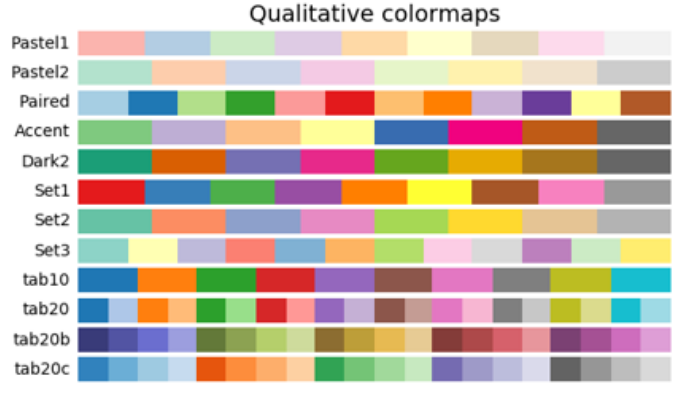

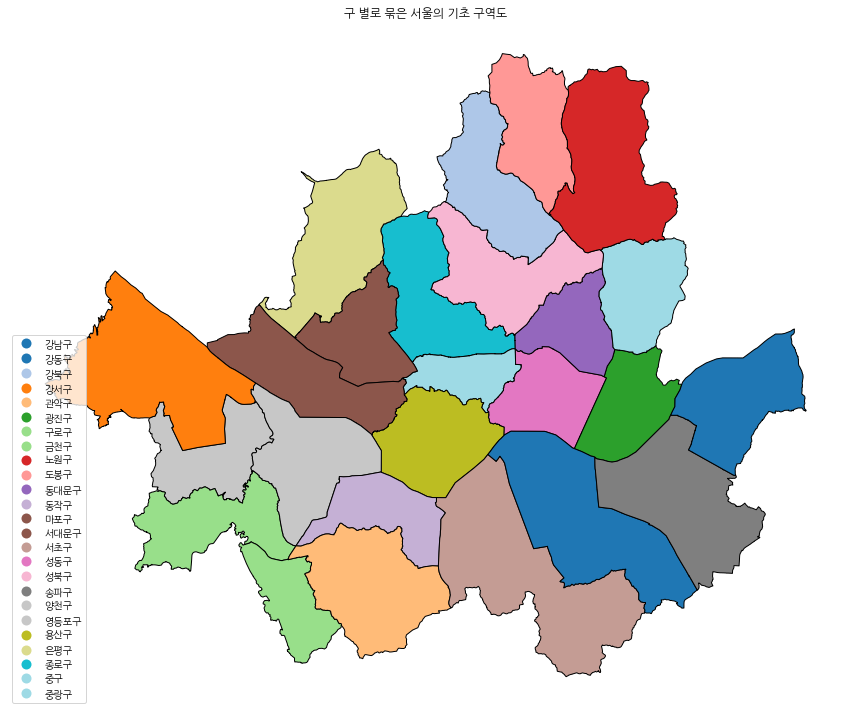

In [53]:
seoul1.geometry = seoul1.buffer(0.1)
seoul1 = seoul.dissolve(by='SIG_CD') # 합집합을 구한다.(groupby 기능이 포함)
ax = seoul1.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()
#25개 자치구라 20가지의 색으로도 다 표현하지 못함

---

#### *수집한 행정동 데이터로 실습*

##### ① 서울특별시 행정동 데이터에는 자치구 열이 없어서 어느 구인지 파악불가 -> 행정구 데이터를 결합

In [46]:
import pandas as pd
code=pd.read_excel('data/서울시 행정구역코드.xlsx', sheet_name=0, header=1)
code

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,11010,종로구,1101053,사직동
1,11,서울특별시,11010,종로구,1101054,삼청동
2,11,서울특별시,11010,종로구,1101055,부암동
3,11,서울특별시,11010,종로구,1101056,평창동
4,11,서울특별시,11010,종로구,1101057,무악동
...,...,...,...,...,...,...
3488,39,제주특별자치도,39020,서귀포시,3902058,서홍동
3489,39,제주특별자치도,39020,서귀포시,3902059,대륜동
3490,39,제주특별자치도,39020,서귀포시,3902060,대천동
3491,39,제주특별자치도,39020,서귀포시,3902061,중문동


In [54]:
seoul_dong

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."
...,...,...,...,...,...
420,20200630,1125070,둔촌1동,421,"POLYGON ((212078.230 447711.872, 212143.611 44..."
421,20200630,1125071,둔촌2동,422,"POLYGON ((213836.559 448672.955, 213835.205 44..."
422,20200630,1125072,암사1동,423,"POLYGON ((211988.426 450586.506, 211989.301 45..."
423,20200630,1125073,천호2동,424,"POLYGON ((210279.922 450065.332, 210287.877 45..."


In [66]:
# 두 개 데이터 결합(merge)
seoul_dong=seoul_dong.astype({'ADM_DR_CD':'int64'}) # 변수 타입 변경
seoul_merge_df = pd.merge(code, seoul_dong, how='right',left_on='읍면동코드',right_on='ADM_DR_CD') # inner join
seoul_merge_df = gpd.GeoDataFrame(seoul_merge_df)
type(seoul_merge_df)

geopandas.geodataframe.GeoDataFrame

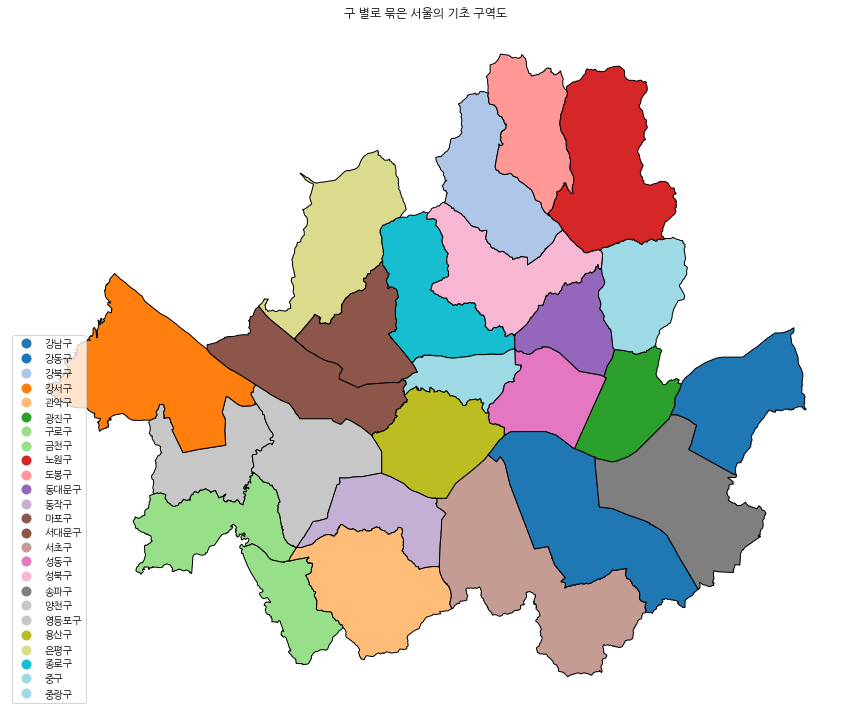

In [67]:
seoul_merge_df.geometry = seoul_merge_df.buffer(0.1)
seoul_merge_df = seoul_merge_df.dissolve(by='시군구코드') # 합집합을 구한다.(groupby 기능이 포함)
ax = seoul_merge_df.plot(figsize=(15, 15), column="시군구명칭", categorical=True,
                cmap="tab20", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()
#25개 자치구라 20가지의 색으로도 다 표현하지 못함